# 1. Data Exploration


Key Steps Taken


1) Loaded & Inspected Data

2) Imported dataset.csv, checked column names, data types, and missing values.

3) Identified Bitcoin & other cryptocurrencies, filtered for Bitcoin only.


In [57]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset.csv")  # Change filename if needed

# Display first few rows
print(df.head())

# Check column names and data types
print(df.info())

# Check basic statistics
print(df.describe())

# Convert 'date' column to datetime format (if present)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)  # Set date as index

# Display dataset after setting date index
print(df.head())


   Unnamed: 0        open        high         low       close  volume  \
0           0  112.900002  118.800003  107.142998  115.910004     0.0   
1           1    3.493130    3.692460    3.346060    3.590890     0.0   
2           2  115.980003  124.663002  106.639999  112.300003     0.0   
3           3    3.594220    3.781020    3.116020    3.371250     0.0   
4           4  112.250000  113.444000   97.699997  111.500000     0.0   

      marketCap                 timestamp crypto_name        date  
0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
--

# 2. Data Cleansing



Key Steps Taken

1. Removed unnecessary columns (timestamp, crypto_name, etc.).

2. Handled outliers → Used IQR method to filter extreme values.

3. Checked stationarity → Applied differencing if needed.


📌 Insights:


Outliers can distort predictions → Removing them improves stability.


Non-stationary data affects ARIMA performance → Fixed with transformations.

In [39]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'timestamp'], inplace=True)

# Filter dataset for only Bitcoin
df = df[df['crypto_name'] == "Bitcoin"]

# Drop 'crypto_name' column since we are only keeping Bitcoin data
df.drop(columns=['crypto_name'], inplace=True)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing values using interpolation
df.interpolate(method='linear', inplace=True)

# Display dataset after cleaning
print(df.head())


Missing Values:
 open         0
high         0
low          0
close        0
volume       0
marketCap    0
dtype: int64
                  open        high         low       close  volume  \
date                                                                 
2013-05-05  112.900002  118.800003  107.142998  115.910004     0.0   
2013-05-06  115.980003  124.663002  106.639999  112.300003     0.0   
2013-05-07  112.250000  113.444000   97.699997  111.500000     0.0   
2013-05-08  109.599998  115.779999  109.599998  113.566002     0.0   
2013-05-09  113.199997  113.459999  109.260002  112.669998     0.0   

               marketCap  
date                      
2013-05-05  1.288693e+09  
2013-05-06  1.249023e+09  
2013-05-07  1.240594e+09  
2013-05-08  1.264049e+09  
2013-05-09  1.254535e+09  


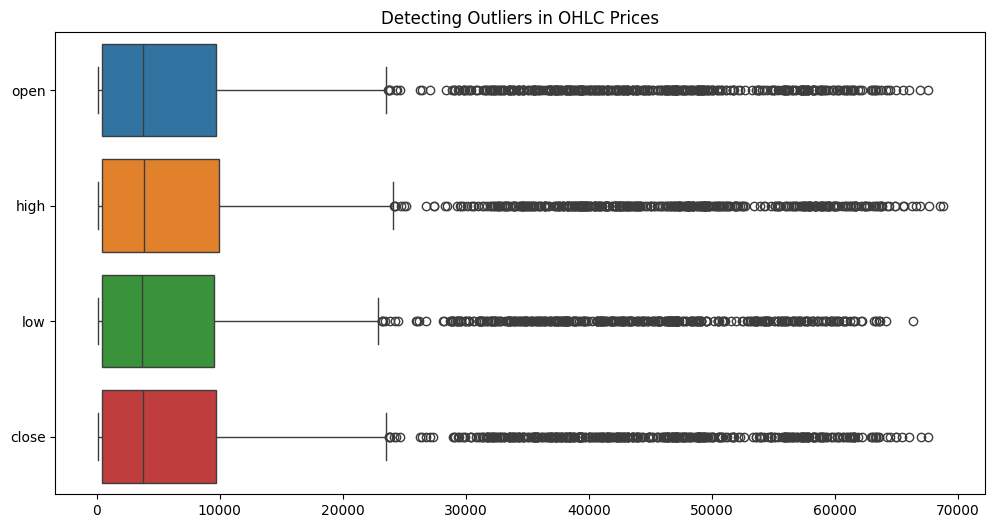

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df[['open', 'high', 'low', 'close']], orient="h")
plt.title("Detecting Outliers in OHLC Prices")
plt.show()


In [41]:
import numpy as np

# Compute IQR for each price column
Q1 = df[['open', 'high', 'low', 'close']].quantile(0.25)
Q3 = df[['open', 'high', 'low', 'close']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df[['open', 'high', 'low', 'close']] < lower_bound) | (df[['open', 'high', 'low', 'close']] > upper_bound)).any(axis=1)]

# Display dataset after removing outliers
print(df.head())


                  open        high         low       close  volume  \
date                                                                 
2013-05-05  112.900002  118.800003  107.142998  115.910004     0.0   
2013-05-06  115.980003  124.663002  106.639999  112.300003     0.0   
2013-05-07  112.250000  113.444000   97.699997  111.500000     0.0   
2013-05-08  109.599998  115.779999  109.599998  113.566002     0.0   
2013-05-09  113.199997  113.459999  109.260002  112.669998     0.0   

               marketCap  
date                      
2013-05-05  1.288693e+09  
2013-05-06  1.249023e+09  
2013-05-07  1.240594e+09  
2013-05-08  1.264049e+09  
2013-05-09  1.254535e+09  


# More Data Exploration

1. Explored Historical Trends: 

- Plotted Bitcoin closing price over time.

- Applied Moving Averages (7-day & 30-day) to identify trends.

- Visualized trading volume spikes and market capitalization trends.


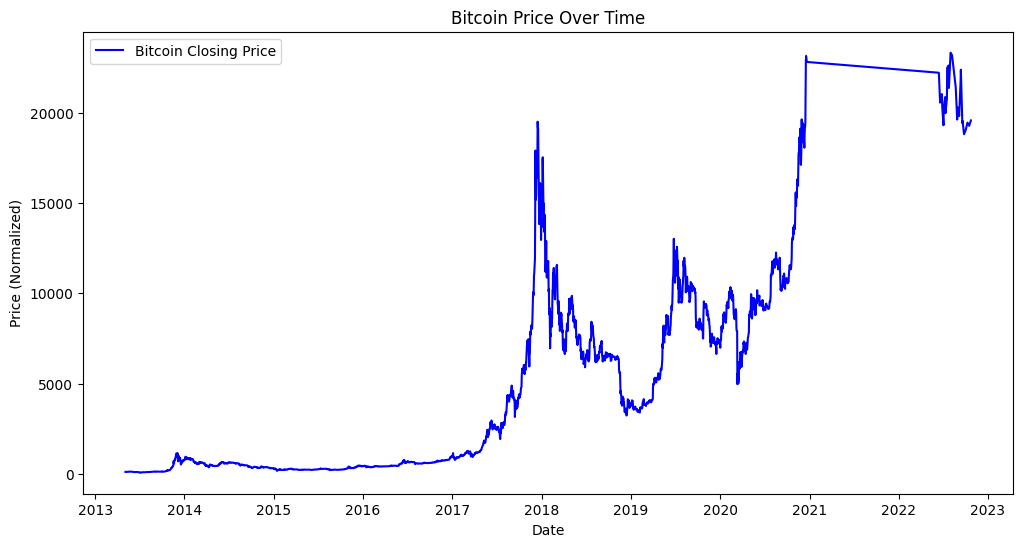

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['close'], label="Bitcoin Closing Price", color='blue')
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (Normalized)")
plt.legend()
plt.show()


The first graph shows Bitcoin’s historical price trend from 2013 to 2023.
Bitcoin price remained low until 2017, then saw a massive spike in late 2017, followed by a crash.
A second major spike occurred in 2021, with extreme volatility after that.
The price movement reflects market cycles, with periods of bull runs followed by sharp declines.
📌 Key Takeaway: Bitcoin is highly volatile, making it difficult for traditional models like ARIMA to capture trends.

KeyError: 'SMA_7'

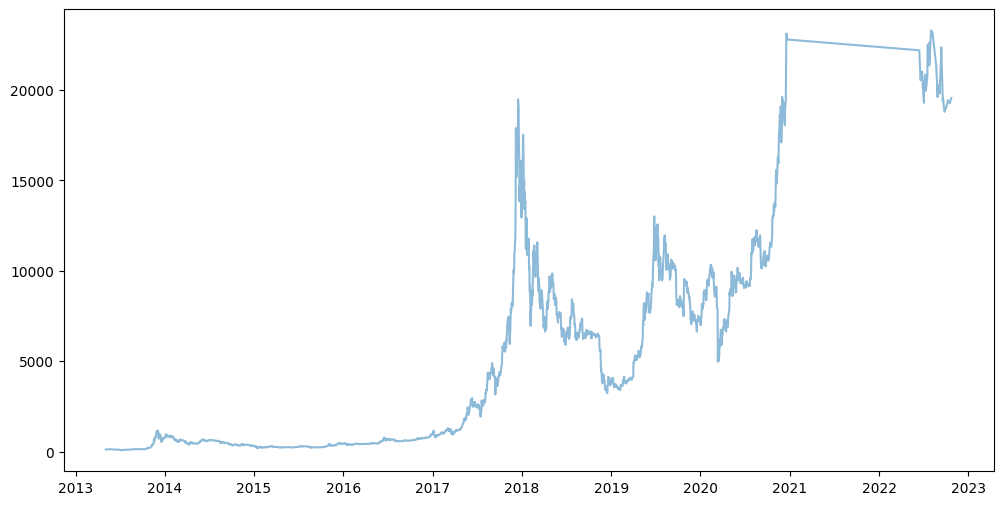

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['close'], label="Closing Price", alpha=0.5)
plt.plot(df.index, df['SMA_7'], label="7-Day SMA", linestyle="dashed")
plt.plot(df.index, df['SMA_30'], label="30-Day SMA", linestyle="dotted")
plt.title("Bitcoin Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (Normalized)")
plt.legend()
plt.show()


2️⃣ Moving Averages (7-Day & 30-Day)
The second graph overlays Moving Averages (SMA) on Bitcoin's closing price.
The 7-day SMA (short-term) follows price movements closely, showing short-term fluctuations.
The 30-day SMA (long-term) smooths out noise and highlights major trends.
This helps reduce noise in predictions and is useful for machine learning models like XGBoost & LSTM.
📌 Key Takeaway: Moving Averages help in trend detection and reducing price volatility effects.



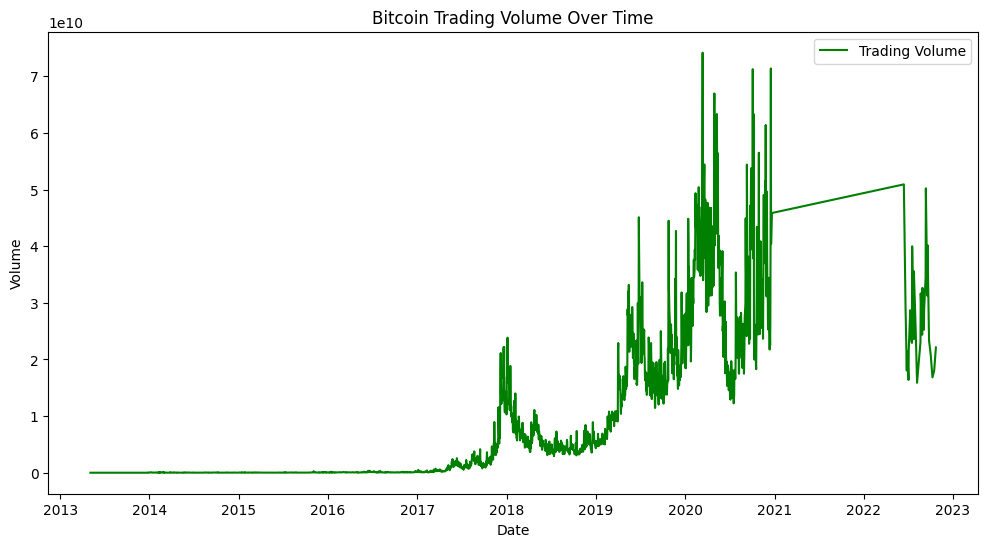

In [45]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['volume'], label="Trading Volume", color='green')
plt.title("Bitcoin Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


3️⃣ Bitcoin Trading Volume Over Time
The third graph shows Bitcoin’s trading volume trends over time.
Low trading volume before 2017 reflects less market adoption.
Significant volume spikes appear during price booms (2017, 2021).
Volume declines after crashes, indicating reduced market activity.
📌 Key Takeaway: High trading volume often precedes large price movements, making it a useful predictive feature.



# Data Preparation


Key Steps Taken

1. Normalized Price Data

Applied MinMax Scaling (0-1 range) to open, high, low, close, and marketCap.

2. Feature Engineering (Technical Indicators)

- 7-day & 30-day Moving Averages (SMA) → Captured long-term trends.
- Relative Strength Index (RSI) → Identified overbought/oversold conditions.
- Daily Return Percentage → Captured market volatility.

3. Prepared Data for Modeling
- Created X (features) → OHLC, MarketCap, SMA, RSI, and Daily Returns.
- Created Y (target) → Next day’s closing price.
- Split into training (80%) and testing (20%) sets.

Insights

These transformations help models detect trends and patterns.
The dataset is now structured for ARIMA, XGBoost, and LSTM forecasting.


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

# Apply normalization
df[['open', 'high', 'low', 'close', 'marketCap']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'marketCap']])

# Display the normalized dataset
print(df.head())


                open      high       low     close  volume  marketCap
date                                                                 
2013-05-05  0.001897  0.001844  0.001823  0.002042     0.0   0.001147
2013-05-06  0.002028  0.002089  0.001801  0.001887     0.0   0.001058
2013-05-07  0.001869  0.001621  0.001409  0.001853     0.0   0.001039
2013-05-08  0.001756  0.001718  0.001931  0.001942     0.0   0.001092
2013-05-09  0.001910  0.001622  0.001916  0.001903     0.0   0.001071


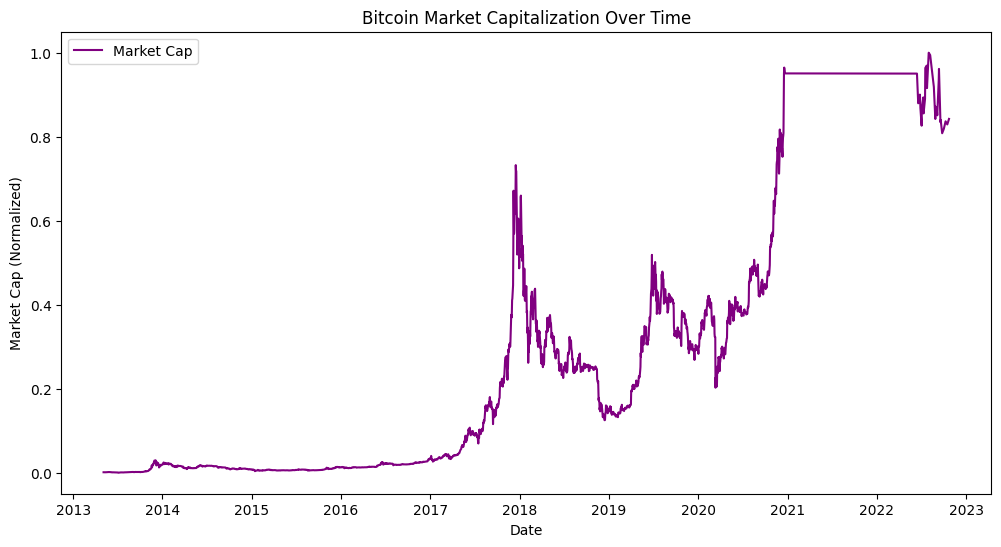

In [49]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['marketCap'], label="Market Cap", color='purple')
plt.title("Bitcoin Market Capitalization Over Time")
plt.xlabel("Date")
plt.ylabel("Market Cap (Normalized)")
plt.legend()
plt.show()


In [58]:
df['SMA_7'] = df['close'].rolling(window=7).mean()   # 7-day moving average
df['SMA_30'] = df['close'].rolling(window=30).mean() # 30-day moving average


In [59]:
df['price_change'] = df['close'].diff()  # Daily price change
gain = df['price_change'].apply(lambda x: x if x > 0 else 0)
loss = df['price_change'].apply(lambda x: -x if x < 0 else 0)

# Compute average gain and loss
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# Compute RSI
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Drop intermediate columns
df.drop(columns=['price_change'], inplace=True)


In [60]:
df['Daily_Return'] = df['close'].pct_change()


In [61]:
df.dropna(inplace=True)

# Display final dataset after feature engineering
print(df.head())


            Unnamed: 0        open        high         low       close  \
date                                                                     
2013-05-19          29  123.210999  124.500000  119.570999  121.989998   
2013-05-20          30  122.500000  123.621002  120.120003  122.000000   
2013-05-20          31    3.314850    3.323340    3.150050    3.181760   
2013-05-21          32    3.193260    3.215970    3.040910    3.086750   
2013-05-21          33  122.019997  123.000000  121.209999  122.879997   

            volume     marketCap                 timestamp crypto_name  \
date                                                                     
2013-05-19     0.0  1.363205e+09  2013-05-19T23:59:59.999Z     Bitcoin   
2013-05-20     0.0  1.363710e+09  2013-05-20T23:59:59.999Z     Bitcoin   
2013-05-20     0.0  5.668275e+07  2013-05-20T23:59:59.999Z    Litecoin   
2013-05-21     0.0  5.507303e+07  2013-05-21T23:59:59.999Z    Litecoin   
2013-05-21     0.0  1.374013e+09  201

In [62]:
# Define feature set (X) - all columns except 'close' (target)
X = df[['open', 'high', 'low', 'marketCap', 'SMA_7', 'SMA_30', 'RSI', 'Daily_Return']]

# Define target variable (Y) - Next day's closing price
df['Y'] = df['close'].shift(-1)  # Shift target one day forward
Y = df['Y']

# Drop last row (since we can't predict the future)
X = X[:-1]
Y = Y[:-1]

# Display final feature-target dataset
print(X.head())
print(Y.head())


                  open        high         low     marketCap      SMA_7  \
date                                                                      
2013-05-19  123.210999  124.500000  119.570999  1.363205e+09  54.458090   
2013-05-20  122.500000  123.621002  120.120003  1.363710e+09  71.469644   
2013-05-20    3.314850    3.323340    3.150050  5.668275e+07  54.350610   
2013-05-21    3.193260    3.215970    3.040910  5.507303e+07  54.336418   
2013-05-21  122.019997  123.000000  121.209999  1.374013e+09  71.419999   

               SMA_30        RSI  Daily_Return  
date                                            
2013-05-19  59.775908  50.250530     35.927613  
2013-05-20  59.978908  54.625475      0.000082  
2013-05-20  59.965270  45.541633     -0.973920  
2013-05-21  56.324829  45.768619     -0.029861  
2013-05-21  60.308454  54.645471     38.808859  
date
2013-05-19    122.000000
2013-05-20      3.181760
2013-05-20      3.086750
2013-05-21    122.879997
2013-05-21      3.120760
N

In [56]:
from sklearn.model_selection import train_test_split

# Split into 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Display dataset shapes
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("Y_train Shape:", Y_train.shape)
print("Y_test Shape:", Y_test.shape)


X_train Shape: (2224, 8)
X_test Shape: (556, 8)
Y_train Shape: (2224,)
Y_test Shape: (556,)
